In [202]:
import sklearn as sk
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

In [203]:
df = pd.read_csv("../data/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


target
1    165
0    138
Name: count, dtype: int64


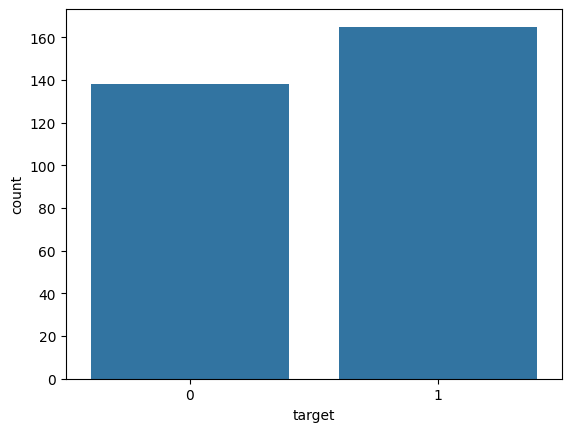

In [205]:
sns.countplot (data=df, x="target")
print (df['target'].value_counts())

In [206]:
for col in df.columns : 
    print (col, set(df[col]))
    print (df[col].dtype)

age {29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77}
int64
sex {0, 1}
int64
cp {0, 1, 2, 3}
int64
trestbps {128, 129, 130, 132, 134, 135, 136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156, 160, 164, 165, 170, 172, 174, 178, 180, 192, 200, 94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117, 118, 120, 122, 123, 124, 125, 126}
int64
chol {564, 126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 

In [207]:
X = df.drop(columns=['target'])
y = df['target']

X.shape, y.shape

((303, 13), (303,))

In [208]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X = SS.fit_transform(X)

In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print (y_train)

(242, 13) (61, 13) (242,) (61,)
122    1
184    0
247    0
34     1
270    0
      ..
91     1
165    0
46     1
152    1
209    0
Name: target, Length: 242, dtype: int64


----

### ML

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.83      0.85      0.84        41

    accuracy                           0.79        61
   macro avg       0.76      0.75      0.76        61
weighted avg       0.78      0.79      0.79        61

accuracy :  0.7868852459016393
f1_score :  0.7550200803212852
recall :  0.7518292682926829
precision :  0.7587719298245614
[[13  6]
 [ 7 35]]


<Axes: >

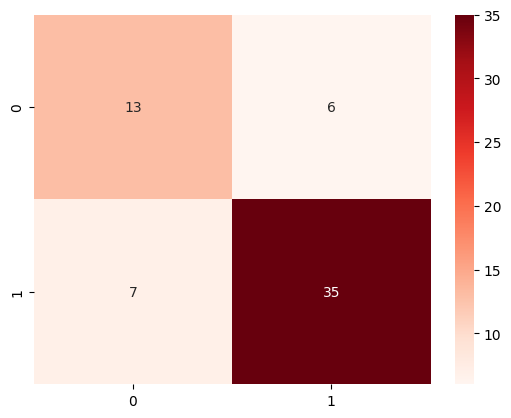

In [210]:
# LR

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score 
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test, average='macro'))
print ("recall : ", recall_score(y_pred, y_test, average='macro'))
print ("precision : ", precision_score(y_pred, y_test, average='macro'))

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')

              precision    recall  f1-score   support

           0       0.63      0.57      0.60        21
           1       0.79      0.82      0.80        40

    accuracy                           0.74        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.73      0.74      0.73        61

accuracy :  0.7377049180327869
f1_score :  0.7024390243902439
recall :  0.6982142857142857
precision :  0.7086466165413534
[[12  7]
 [ 9 33]]


<Axes: >

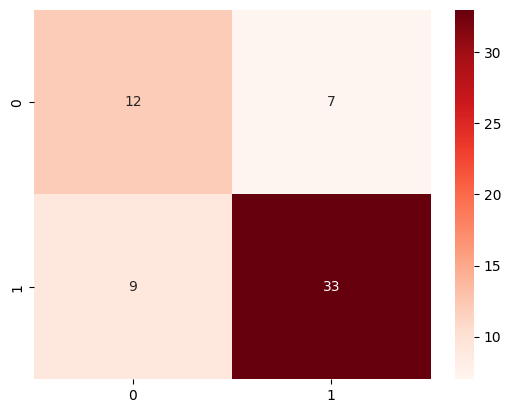

In [211]:
# DT

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test, average='macro'))
print ("recall : ", recall_score(y_pred, y_test, average='macro'))
print ("precision : ", precision_score(y_pred, y_test, average='macro'))

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        19
           1       0.86      0.86      0.86        42

    accuracy                           0.80        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.80      0.80      0.80        61

accuracy :  0.8032786885245902
f1_score :  0.7706766917293233
recall :  0.7706766917293233
precision :  0.7706766917293233
[1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0]
28     1
116    1
158    1
1      1
241    0
129    1
14     1
88     1
30     1
148    1
181    0
195    0
108    1
106    1
276    0
156    1
22     1
47     1
239    0
139    1
Name: target, dtype: int64
[[13  6]
 [ 6 36]]


<Axes: >

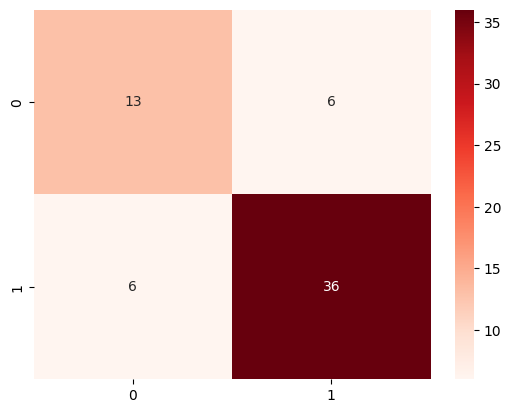

In [212]:
# RF

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test, average='macro'))
print ("recall : ", recall_score(y_pred, y_test, average='macro'))
print ("precision : ", precision_score(y_pred, y_test, average='macro'))

print (y_pred[:20])
print (y_test[:20])

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')

              precision    recall  f1-score   support

           0       0.74      0.67      0.70        21
           1       0.83      0.88      0.85        40

    accuracy                           0.80        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.80      0.80      0.80        61

accuracy :  0.8032786885245902
f1_score :  0.776829268292683
recall :  0.7708333333333333
precision :  0.7850877192982456
[[14  5]
 [ 7 35]]


<Axes: >

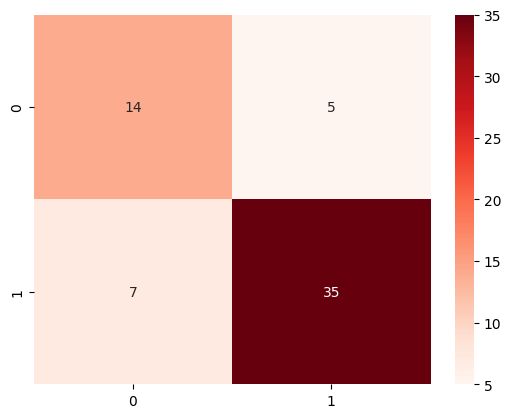

In [213]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test, average='macro'))
print ("recall : ", recall_score(y_pred, y_test, average='macro'))
print ("precision : ", precision_score(y_pred, y_test, average='macro'))

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')

1
accuracy :  0.819672131147541
f1_score :  0.8063492063492064
recall :  0.7983516483516484
precision :  0.8402255639097744

2
accuracy :  0.7377049180327869
f1_score :  0.7288888888888889
recall :  0.7408602150537634
precision :  0.7807017543859649

3
accuracy :  0.8360655737704918
f1_score :  0.8184523809523809
recall :  0.8083524027459954
precision :  0.8377192982456141

4
accuracy :  0.7868852459016393
f1_score :  0.7750354609929078
recall :  0.7732683982683983
precision :  0.8164160401002507

5
accuracy :  0.8032786885245902
f1_score :  0.776829268292683
recall :  0.7708333333333333
precision :  0.7850877192982456

6
accuracy :  0.819672131147541
f1_score :  0.8024727700912571
recall :  0.7927927927927928
precision :  0.8258145363408521

7
accuracy :  0.819672131147541
f1_score :  0.7927092987333951
recall :  0.7890243902439025
precision :  0.7969924812030075

8
accuracy :  0.7868852459016393
f1_score :  0.7665587282896673
recall :  0.7584459459459459
precision :  0.78759398496240

([<matplotlib.axis.XTick at 0x198608750>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41'),
  Text(42, 0, '42'),
  Text(43, 0, '43'),
  Text(44, 0, '44'),
  Text(45, 0, '45'),
  Text(46, 0, '46'),
  Text(47,

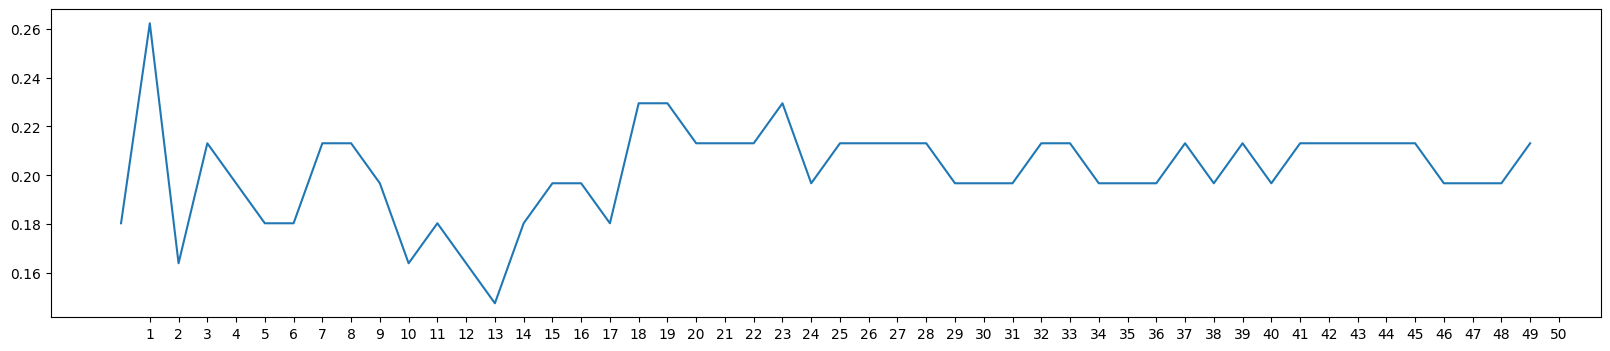

In [214]:
# KNN with finding elbow

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

scores = []

for K in range (50) : 
    model = KNeighborsClassifier(n_neighbors=K+1)
    model.fit (X_train, y_train)
    y_pred = model.predict (X_test)
    print (K+1)
    print ("accuracy : ", accuracy_score(y_pred, y_test))
    print ("f1_score : ", f1_score(y_pred, y_test, average='macro'))
    print ("recall : ", recall_score(y_pred, y_test, average='macro'))
    print ("precision : ", precision_score(y_pred, y_test, average='macro'))
    print ()
    scores.append (1-accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(20, 4))
plt.plot (scores)
plt.xticks([i for i in range (1, 51)])


              precision    recall  f1-score   support

           0       0.84      0.70      0.76        23
           1       0.83      0.92      0.88        38

    accuracy                           0.84        61
   macro avg       0.84      0.81      0.82        61
weighted avg       0.84      0.84      0.83        61

accuracy :  0.8360655737704918
f1_score :  0.8184523809523809
recall :  0.8083524027459954
precision :  0.8377192982456141
[[16  3]
 [ 7 35]]


<Axes: >

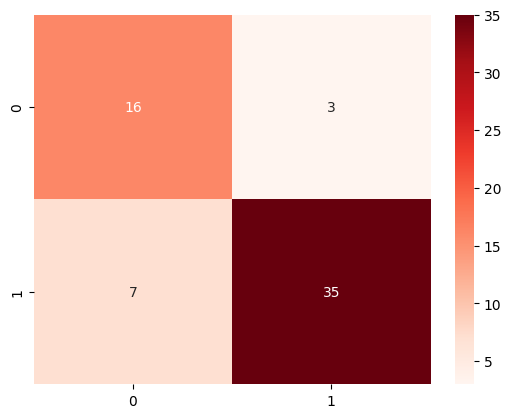

In [215]:
# SVM

from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test, average='macro'))
print ("recall : ", recall_score(y_pred, y_test, average='macro'))
print ("precision : ", precision_score(y_pred, y_test, average='macro'))

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')

----

### DL

In [216]:
# one-hot encoding

from sklearn.preprocessing import OneHotEncoder

y = np.array(y).reshape(-1, 1)
y_encoded = OneHotEncoder().fit_transform(y)
print (y) 
print (y_encoded.toarray())

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [217]:
from sklearn.model_selection import train_test_split

y_encoded = y_encoded.toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, 
                                                    test_size=0.2)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print (y_train)

(242, 13) (61, 13) (242, 2) (61, 2)
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [218]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(13,), activation="relu"))  
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(80, activation="relu"))
model.add(tf.keras.layers.Dense(40, activation="relu"))
model.add(tf.keras.layers.Dense(20, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="sigmoid"))

model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,422 (52.43 KB)

 Trainable params: 13,422 (52.43 KB)

 Non-trainable params: 0 (0.00 B)

In [219]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy')

In [220]:
history = model.fit(X_train, y_train,
         epochs=100, batch_size=16, validation_split = 0.1)

print (history.history)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.6938 - val_loss: 0.6520
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6076 - val_loss: 0.6050
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5136 - val_loss: 0.5523
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4765 - val_loss: 0.5606
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3490 - val_loss: 0.6044
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2984 - val_loss: 0.5762
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3164 - val_loss: 0.5784
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2899 - val_loss: 0.6328
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3174 - val_loss: 0.6876
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2137 - val_loss: 0.6300
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2377 - val_loss: 0.7712
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

Epoch 69/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2028e-04 - val_loss: 4.2601
Epoch 70/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1283e-04 - val_loss: 4.2821
Epoch 71/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2969e-04 - val_loss: 4.3162
Epoch 72/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2621e-04 - val_loss: 4.3625
Epoch 73/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4615e-04 - val_loss: 4.3637
Epoch 74/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8083e-04 - val_loss: 4.3983
Epoch 75/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6799e-04 - val_loss: 4.4183
Epoch 76/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6504e-04 - val_loss: 4.4417
Epoch 77/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4739e-04 - val_loss: 4.4619
Epoch 78/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5810e-04 - val_loss: 4.4889
Epoch 79/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2732e-04 - val_loss: 4.5082
Epoch 80/1

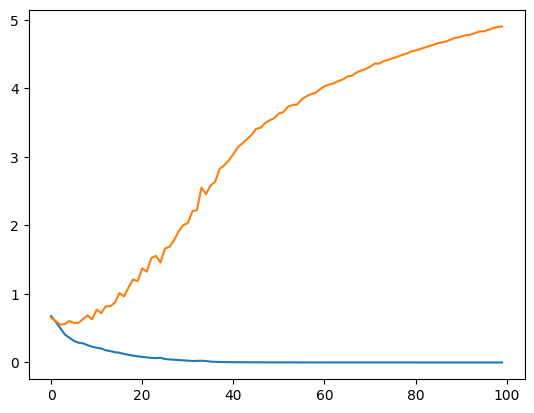

In [221]:
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Accuracy: 0.8360655737704918
F1 Score: 0.8360215053763441
Recall: 0.8372844827586207
Precision: 0.8365591397849462
Confusion Matrix:
 [[25  4]
 [ 6 26]]


<Axes: >

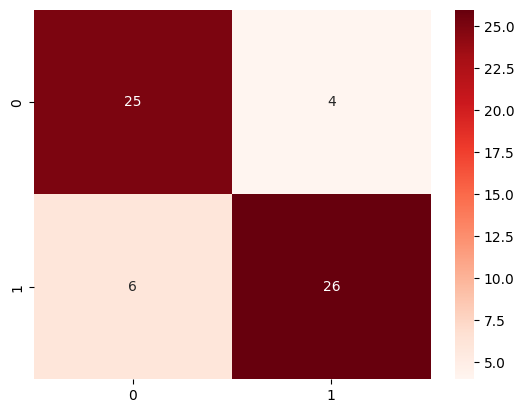

In [222]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

y_pred_proba = model.predict(X_test)

y_pred = np.argmax(y_pred_proba, axis=1) 

if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)  

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("Precision:", precision_score(y_test, y_pred, average='macro'))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')